# ID2214/FID3214 Assignment 1 Group no. 12
### Project members: 
Aksel Uhr, auhr@kth.se
Olivia Höft, hoft@kth.se
Ilias Merentitis, iliasme@kth.se

### Declaration:
By submitting this solution, it is hereby declared that all individuals listed above have contributed to the solution, either with code that appear in the final solution below, or with code that has been evaluated and compared to the final solution, but for some reason has been excluded. It is also declared that all project members fully understand all parts of the final solution and can explain it upon request.

It is furthermore declared that the code below is a contribution by the project members only, and specifically that no part of the solution has been copied from any other source (except for lecture slides at the course ID2214/FID3214) and no part of the solution has been provided by someone not listed as project member above.

It is furthermore declared that it has been understood that no other library/package than the Python 3 standard library, NumPy and pandas may be used in the solution for this assignment.

### Instructions
All parts of the assignment starting with number 1 below are mandatory. Satisfactory solutions
will give 1 point (in total). If they in addition are good (all parts work more or less 
as they should), completed on time (submitted before the deadline in Canvas) and according
to the instructions, together with satisfactory solutions of all parts of the assignment starting 
with number 2 below, then the assignment will receive 2 points (in total).

Note that you do not have to develop the code directly within the notebook
but may instead copy the comments and test cases to a more convenient development environment
and when everything works as expected, you may paste your functions into this
notebook, do a final testing (all cells should succeed) and submit the whole notebook 
(a single file) in Canvas (do not forget to fill in your group number and names above).

## Load NumPy and pandas

In [3]:
import numpy as np
import pandas as pd

## 1a. Create and apply column filter

In [314]:
# Insert the functions create_column_filter and apply_column_filter below (after the comments)
#
# Input to create_column_filter:
# df - a dataframe (where the column names "CLASS" and "ID" have special meaning)
#
# Output from create_filter:
# df            - a new dataframe, where columns, except "CLASS" and "ID", containing only missing values 
#                 or only one unique value (apart from the missing values) have been dropped
# column_filter - a list of the names of the remaining columns, including "CLASS" and "ID"
#

# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
# Modify copy? 

# Hint 2: Iterate through all columns and consider to drop a column only if it is not labeled "CLASS" or "ID"
# Why dropping?
#
# Hint 3: You may check the number of unique (non-missing) values in a column by applying the pandas functions
#         dropna and unique to drop missing values and get the unique (remaining) values
#
# Input to apply_column_filter:
# df            - a dataframe
# column_filter - a list of the names of the columns to keep (see above)
#
# Output from apply_column_filter:
# df - a new dataframe, where each column that is not included in column_filter has been dropped
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)

def create_column_filter(df):
    
    # Copies the input df
    dfCopy = df.copy()
    
    # Adds an id column 
    _id = [1, 0, 1, 1, 0]
    dfCopy['ID'] = _id    
   
    # Drops each column with only one unique value + one unique value with nan(s)
    for col in dfCopy.columns:
        if (col != "CLASS" and col != "ID") and (len(dfCopy[col].unique()) == 1 or (len(dfCopy[col].unique()) == 2 and dfCopy.isnull().values.any())):
            dfCopy.drop(col,inplace=True,axis=1)
             
    # Extracting column names and converts to list
    remainingColumns = dfCopy.columns.values.tolist()
    return dfCopy, remainingColumns

def apply_column_filter(df, column_filter):
    
    # Copies the input df
    dfCopy = df.copy()
    
    # Finds all similar column names and keep the values of them
    # Discards the rest
    df_final = dfCopy[dfCopy.columns.intersection(column_filter)]
    return df_final
    
    


In [315]:
# Test your code (leave this part unchanged)

df = pd.DataFrame({"CLASS":[1,0,1,0,1],"A":[1,2,np.nan,4,5],"B":[1,1,1,1,np.nan],"C":["h","h",np.nan,"i","h"],"D":[np.nan,np.nan,np.nan,np.nan,np.nan]})

filtered_df, column_filter = create_column_filter(df)

new_df = pd.DataFrame({"CLASS":[1,0,0],"A":[4,5,6],"B":[1,2,1],"C":[np.nan,np.nan,np.nan],"D":[np.nan,4,5]})

filtered_new_df = apply_column_filter(new_df,column_filter)

display("df",df)
display("filtered_df",filtered_df)
display("new_df",new_df)
display("filtered_new_df",filtered_new_df)

'df'

,CLASS,A,B,C,D
0,1,1.0,1.0,h,NaN
1,0,2.0,1.0,h,NaN
2,1,NaN,1.0,NaN,NaN
3,0,4.0,1.0,i,NaN
4,1,5.0,NaN,h,NaN


'filtered_df'

,CLASS,A,C,ID
0,1,1.0,h,1
1,0,2.0,h,0
2,1,NaN,NaN,1
3,0,4.0,i,1
4,1,5.0,h,0


'new_df'

,CLASS,A,B,C,D
0,1,4,1,NaN,NaN
1,0,5,2,NaN,4.0
2,0,6,1,NaN,5.0


'filtered_new_df'

,CLASS,A,C
0,1,4,NaN
1,0,5,NaN
2,0,6,NaN


## 1b. Create and apply normalization

In [317]:
# Insert the functions create_normalization and apply_normalization below (after the comments)
#
# Input to create_normalization:
# df: a dataframe (where the column names "CLASS" and "ID" have special meaning)
# normalizationtype: "minmax" (default) or "zscore"
#
# Output from create_normalization:
# df            - a new dataframe, where each numeric value in a column has been replaced by a normalized value
# normalization - a mapping (dictionary) from each column name to a triple, consisting of
#                ("minmax",min_value,max_value) or ("zscore",mean,std)
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
#
# Hint 2: Consider columns of type "float" or "int" only (and which are not labeled "CLASS" or "ID"),
#         the other columns should remain unchanged
#
# Hint 3: Take a close look at the lecture slides on data preparation
#
# Input to apply_normalization:
# df            - a dataframe
# normalization - a mapping (dictionary) from column names to triples (see above)
#
# Output from apply_normalization:
# df - a new dataframe, where each numerical value has been normalized according to the mapping
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
#
# Hint 2: For minmax-normalization, you may consider to limit the output range to [0,1]
def create_normalization(df, normalizationtype = "minmax"):
  
    # Creates df copy
    dfCopy = df.copy()
    
    # Empty dict for normalization
    normalization = {}

    # Iterating through the columns
    for col in dfCopy.columns:
        
        # Checks type and column name
        if (col != "CLASS" and col != "ID") and (dfCopy[col].dtype == np.int64 or dfCopy[col].dtype == np.float64):
            
            # Fetches min and max for each column and applies normalization
            # Adds to dictionary
            if(normalizationtype == "minmax"):
                min = dfCopy[col].min()
                max = dfCopy[col].max()
                dfCopy[col] = [(x-min)/(max-min) for x in dfCopy[col]]
                normalization[col] = ("minmax", min, max)
                
            # Calculates mean and standard deviation for each column and applies noralization
            # Adds to dictionary
            elif (normalizationtype == "zscore"):
                mean = dfCopy[col].mean()
                std = dfCopy[col].std()
                dfCopy[col] = df[col].apply(lambda x: (x-mean)/std)
                normalization[col] = ("zscore",mean,std)

    return dfCopy, normalization
                
def apply_normalization(df, normalization):
    
    # Creates df copy
    dfCopy = df.copy()
    
    # Applies different normalization based on type for each column 
    for col in dfCopy:
        if(col != "CLASS" and col != "ID"):
            if(normalization[col][0] == 'minmax'):
                dfCopy[col] = [(x-normalization[col][1])/(normalization[col][2]-normalization[col][1]) for x in dfCopy[col]]
            elif(normalization[col][0] == 'zscore'):
                dfCopy[col].apply(lambda x: (x- normalization[col][1])/normalization[col][2])
            
    return dfCopy    
    

In [319]:
# Test your code (leave this part unchanged)

glass_train_df = pd.read_csv("glass_train.csv")

glass_test_df = pd.read_csv("glass_test.csv")

glass_train_norm, normalization = create_normalization(glass_train_df,normalizationtype="minmax")
print("normalization:\n")
for f in normalization:
    print("{}:{}".format(f,normalization[f]))

print()
    
glass_test_norm = apply_normalization(glass_test_df,normalization)
display("glass_test_norm",glass_test_norm)

normalization:

RI:('minmax', 1.51131, 1.53125)
Na:('minmax', 10.73, 15.79)
Mg:('minmax', 0.0, 4.49)
Al:('minmax', 0.29, 3.04)
Si:('minmax', 69.81, 75.18)
K:('minmax', 0.0, 6.21)
Ca:('minmax', 5.43, 14.68)
Ba:('minmax', 0.0, 3.15)
Fe:('minmax', 0.0, 0.37)



'glass_test_norm'

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,CLASS
0,101,0.262788,0.399209,0.634744,0.418182,0.644320,0.091787,0.363243,0.034921,0.594595,2
1,104,0.799398,0.606719,0.701559,0.134545,0.141527,0.012882,0.671351,0.000000,0.000000,2
2,44,0.541123,0.592885,0.855234,0.156364,0.363128,0.027375,0.465946,0.000000,0.000000,1
3,17,0.327482,0.385375,0.817372,0.316364,0.614525,0.098229,0.353514,0.000000,0.000000,1
4,81,0.231194,0.420949,0.783964,0.665455,0.530726,0.111111,0.274595,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
102,80,0.230191,0.413043,0.783964,0.585455,0.567970,0.111111,0.274595,0.000000,0.000000,2
103,141,0.280341,0.513834,0.788419,0.480000,0.508380,0.109501,0.289730,0.000000,0.000000,2
104,14,0.309428,0.420949,0.792873,0.356364,0.633147,0.086957,0.318919,0.000000,0.459459,1
105,132,0.743731,0.586957,0.000000,0.389091,0.266294,0.030596,0.865946,0.000000,0.270270,2


### Comment on assumptions, things that do not work properly, etc.


## 1c. Create and apply imputation

In [343]:
# Insert the functions create_imputation and apply_imputation below (after the comments)
#
# Input to create_imputation:
# df: a dataframe (where the column names "CLASS" and "ID" have special meaning)
#
# Output from create_imputation:
# df         - a new dataframe, where each missing numeric value in a column has been replaced by the mean of that column 
#              and each missing categoric value in a column has been replaced by the mode of that column
# imputation - a mapping (dictionary) from column name to value that has replaced missing values
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
#
# Hint 2: Handle columns of type "float" or "int" only (and which are not labeled "CLASS" or "ID") in one way
#         and columns of type "object" and "category" in other ways
#
# Hint 3: Consider using the pandas functions mean and mode respectively, as well as fillna
#
# Hint 4: In the rare case of all values in a column being missing*, replace numeric values with 0,
#         object values with "" and category values with the first category (cat.categories[0])  
#
#         *Note that this will not occur if the previous column filter function has been applied
#
# Input to apply_imputation:
# df         - a dataframe
# imputation - a mapping (dictionary) from column name to value that should replace missing values
#
# Output from apply_imputation:
# df - a new dataframe, where each missing value has been replaced according to the mapping
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
#
# Hint 2: Consider using fillna

def create_imputation(df):
    dfCopy = df.copy()
    dictionary = {}
    
    for col in dfCopy:
        
        # Checks type and column name
        if (col != "CLASS" and col != "ID") and (dfCopy[col].dtype == np.int64 or dfCopy[col].dtype == np.float64):
                if dfCopy[col].isnull().all():
                    dfCopy[col].fillna(0, inplace=True)
                    dictionary[col] = 0 
                else:
                    mean = dfCopy[col].mean()
                    dfCopy[col].fillna(mean, inplace=True)
                    dictionary[col] = mean 
        elif dfCopy[col].dtype == np.object:
                if dfCopy[col].isnull().all():
                    dfCopy[col].fillna('', inplace=True)
                    dictionary[col] = '' 
                else:
                    mode = dfCopy[col].mode()
                    dfCopy[col].fillna(mode[0], inplace=True)
                    dictionary[col] = mode[0] 
                    
    return dfCopy, dictionary

def apply_imputation(df, dictionary):
    dfCopy = df.copy()
    
    for col in dictionary:
        dfCopy.fillna(dictionary[col], inplace=True)
        
    return dfCopy

In [344]:
# Test your code (leave this part unchanged)

anneal_train_df = pd.read_csv("anneal_train.csv")
anneal_test_df = pd.read_csv("anneal_test.csv")

anneal_train_imp, imputation = create_imputation(anneal_train_df)
anneal_test_imp = apply_imputation(anneal_test_df,imputation)

print("Imputation:\n")
for f in imputation:
    print("{}:{}".format(f,imputation[f]))

print("\nNo. of replaced missing values in training data:\n{}".format(anneal_train_imp.count()-anneal_train_df.count()))
print("\nNo. of replaced missing values in test data:\n{}".format(anneal_test_imp.count()-anneal_test_df.count()))

Imputation:

family:TN
product-type:C
steel:A
carbon:3.859688195991091
hardness:13.084632516703786
temper_rolling:T
condition:S
formability:2.2517482517482517
strength:26.302895322939868
non-ageing:N
surface-finish:P
surface-quality:E
enamelability:1.7142857142857142
bc:Y
bf:Y
bt:Y
bw/me:B
bl:Y
m:0
chrom:C
phos:P
cbond:Y
marvi:0
exptl:0
ferro:Y
corr:0
blue-bright-varn-clean:B
lustre:Y
jurofm:0
s:0
p:0
shape:SHEET
thick:1.1911937639198227
width:769.4917594654789
len:1229.293986636971
oil:Y
bore:35.18930957683742
packing:3.0
CLASS:3

No. of replaced missing values in training data:
family                    382
product-type                0
steel                      43
carbon                      0
hardness                    0
temper_rolling            374
condition                 160
formability               163
strength                    0
non-ageing                391
surface-finish            444
surface-quality           128
enamelability             442
bc                     

### Comment on assumptions, things that do not work properly, etc.

## 1d. Create and apply discretization

In [345]:
# Insert the functions create_bins and apply_bins below
#
# Input to create_bins:
# df      - a dataframe
# nobins  - no. of bins (default = 10)
# bintype - either "equal-width" (default) or "equal-size" 
#
# Output from create_bins:
# df      - a new dataframe, where each numeric feature value has been replaced by a categoric (corresponding to some bin)
# binning - a mapping (dictionary) from column name to bins (threshold values for the bin)
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
#
# Hint 2: Discretize columns of type "float" or "int" only (and which are not labeled "CLASS" or "ID")
#
# Hint 3: Consider using pd.cut and pd.qcut respectively, with labels=False and retbins=True
#
# Hint 4: Set all columns in the new dataframe to be of type "category"
#
# Hint 5: Set the categories of the discretized features to be [0,...,nobins-1]
#
# Hint 6: Change the first and the last element of each binning to -np.inf and np.inf respectively 
#
# Input to apply_bins:
# df      - a dataframe
# binning - a mapping (dictionary) from column name to bins (threshold values for the bin)
#
# Output from apply_bins:
# df - a new dataframe, where each numeric feature value has been replaced by a categoric (corresponding to some bin)
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
#
# Hint 2: Consider using pd.cut 
#
# Hint 3: Set all columns in the new dataframe to be of type "category"
#
# Hint 4: Set the categories of the discretized features to be [0,...,nobins-1]

def create_bins(df, nobins = 10, bintype = "equal-width"):
    dfCopy = df.copy()
    binning = {}

    for col in dfCopy.columns:
        if (col != "CLASS" and col != "ID") and (dfCopy[col].dtype == np.int64 or dfCopy[col].dtype == np.float64):
            #Buckets with approximately the same range
            if bintype == "equal-width":
                dfCopy[col], bins = pd.cut(dfCopy[col], nobins, retbins=True, labels=False)
                binning[col] = bins
            #Buckets with approximately the same number of values in each bucket
            elif bintype == "equal-size":
                dfCopy[col], bins = pd.qcut(dfCopy[col], q=nobins, retbins=True, labels=False, duplicates="drop")
                binning[col] = bins

            binning[col][0] = -np.inf
            binning[col][-1] = np.inf

    dfCopy[dfCopy.columns] = dfCopy[dfCopy.columns].astype('category')
    return dfCopy, binning

def apply_bins(df, binning):
    dfCopy = df.copy()

    for col in binning:
        dfCopy[col] = pd.cut(dfCopy[col], binning[col], labels=False)

    dfCopy[dfCopy.columns] = dfCopy[dfCopy.columns].astype('category')
    return dfCopy

In [346]:
# Test your code  (leave this part unchanged)

glass_train_df = pd.read_csv("glass_train.csv")

glass_test_df = pd.read_csv("glass_test.csv")

glass_train_disc, binning = create_bins(glass_train_df,nobins=10,bintype="equal-size")
print("binning:")
for f in binning:
    print("{}:{}".format(f,binning[f]))

print()    
glass_test_disc = apply_bins(glass_test_df,binning)
display("glass_test_disc",glass_test_disc)

binning:
RI:[    -inf 1.515896 1.51618  1.516516 1.516866 1.51753  1.517902 1.518618
 1.520114 1.521846      inf]
Na:[  -inf 12.73  12.872 13.    13.222 13.38  13.492 13.794 14.198 14.82
    inf]
Mg:[ -inf 1.82  3.188 3.41  3.476 3.55  3.61  3.728   inf]
Al:[ -inf 0.906 1.172 1.23  1.348 1.48  1.54  1.622 1.808 2.094   inf]
Si:[  -inf 71.756 72.196 72.388 72.72  72.79  72.966 73.06  73.208 73.372
    inf]
K:[ -inf 0.006 0.148 0.39  0.54  0.576 0.6   0.636 0.67    inf]
Ca:[  -inf  7.978  8.112  8.338  8.554  8.67   8.81   9.032  9.674 10.924
    inf]
Ba:[-inf 0.78  inf]
Fe:[ -inf 0.062 0.118 0.24    inf]



'glass_test_disc'

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,CLASS
0,101,3,1,1,4,8,4,5,0,2,2
1,104,9,7,1,0,0,1,9,0,0,2
2,44,9,6,7,0,1,2,8,0,0,1
3,17,5,0,6,1,7,6,5,0,0,1
4,81,1,1,4,9,3,8,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
102,80,1,1,4,8,5,8,0,0,0,2
103,141,4,4,4,6,3,8,1,0,0,2
104,14,4,1,5,3,8,3,3,0,2,1
105,132,9,6,0,4,0,2,9,0,1,2


### Comment on assumptions, things that do not work properly, etc.

## 1e. Create and apply one-hot encoding

In [347]:
# Insert the functions create_one_hot and apply_one_hot below
#
# Input to create_one_hot:
# df: a dataframe
#
# Output from create_one_hot:
# df      - a new dataframe, where each categoric feature has been replaced by a set of binary features 
#           (as many new features as there are possible values)
# one_hot - a mapping (dictionary) from column name to a set of categories (possible values for the feature)
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
#
# Hint 2: Consider columns of type "object" or "category" only (and which are not labeled "CLASS" or "ID")
#
# Hint 3: Consider creating new column names by merging the original column name and the categorical value
#
# Hint 4: Set all new columns to be of type "float"
#
# Hint 5: Do not forget to remove the original categoric feature
#
# Input to apply_one_hot:
# df      - a dataframe
# one_hot - a mapping (dictionary) from column name to categories
#
# Output from apply_one_hot:
# df - a new dataframe, where each categoric feature has been replaced by a set of binary features
#
# Hint: See the above Hints

def create_one_hot(df):
    dfCopy = df.copy()
    one_hot = {}

    for col in dfCopy.columns:
        if (col != "CLASS" and col != "ID"):

            dfCopy[col] = dfCopy[col].astype("category")
            one_hot[col]= list(dfCopy[col].cat.categories)

            y = pd.get_dummies(dfCopy[col], prefix = col, dtype=float)
            dfCopy = pd.concat([dfCopy, y], axis=1)

    dfCopy.drop(dfCopy.iloc[:, :9], inplace = True, axis = 1)

    return dfCopy, one_hot

def apply_one_hot(df, one_hot):
    dfCopy = df.copy()
    
    for col in one_hot:
        y = pd.get_dummies(dfCopy[col], dtype=float)
        for cat in one_hot[col]:
            dfCopy[col+'-'+cat] = y[cat]
    
    dfCopy.drop(dfCopy.iloc[:, :9], inplace = True, axis = 1)

    return dfCopy
 

In [348]:
# Test your code  (leave this part unchanged)

train_df = pd.read_csv("tic-tac-toe_train.csv")

new_train, one_hot = create_one_hot(train_df)

test_df = pd.read_csv("tic-tac-toe_test.csv")

new_test_df = apply_one_hot(test_df,one_hot)
display("new_test_df",new_test_df)

'new_test_df'

,CLASS,top-left-square-b,top-left-square-o,top-left-square-x,top-middle-square-b,top-middle-square-o,top-middle-square-x,top-right-square-b,top-right-square-o,top-right-square-x,...,middle-right-square-x,bottom-left-square-b,bottom-left-square-o,bottom-left-square-x,bottom-middle-square-b,bottom-middle-square-o,bottom-middle-square-x,bottom-right-square-b,bottom-right-square-o,bottom-right-square-x
0,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,positive,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,negative,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,positive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,positive,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
475,negative,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
476,positive,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
477,positive,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Comment on assumptions, things that do not work properly, etc.

## 1f. Divide a dataset into a training and a test set

In [382]:
# Insert the function split below
#
# Input to split:
# df           - a dataframe
# testfraction - a float in the range (0,1) (default = 0.5)
#
# Output from split:
# trainingdf - a dataframe consisting of a random sample of (1-testfraction) of the rows in df
# testdf     - a dataframe consisting of the rows in df that are not included in trainingdf
#
# Hint: You may use np.random.permutation(df.index) to get a permuted list of indexes where a 
#       prefix corresponds to the test instances, and the suffix to the training instances 
    

def split(df, testfraction=0.5):
    dfCopy = df.copy()
    
    trainingdf = dfCopy.sample(frac=1-testfraction)
    testdf = dfCopy.drop(trainingdf.index)
    testdf = testdf.sample(frac=1)

    return trainingdf, testdf 

In [385]:
# Test your code  (leave this part unchanged)

glass_df = pd.read_csv("glass.csv")

glass_train, glass_test = split(glass_df,testfraction=0.25)

print("Training IDs:\n{}".format(glass_train["ID"].values))

print("\nTest IDs:\n{}".format(glass_test["ID"].values))

print("\nOverlap: {}".format(set(glass_train["ID"]).intersection(set(glass_test["ID"]))))

Training IDs:
[ 20  75 162 131   4 209 173  24 142   2 101 122 155 111  38 169  26 190
 171 153 140 146 165 126 133 194  43  94  80 148  37  50 136 152 185 179
   9 181  92  19 139  59  57 195 213  22 128 170  88  21 124  56  13  86
  35 138 186 202 172 193 160  30   5 143 177 113  66  63 207  72 105  42
 137  95 183 197 184 123 129 187  17   6  77  32  16  25  31 157  29 192
  97  87 214  70 182  67  40 141  85  52   1 109  36 149  96  12  47 116
  11 175  33 130 117  49  89 159  91 147 114 188  90 200  15 158 180 212
  73  84 103  55 115 145  82  62 120  23  44  64 178 144  81  58 127  65
 201  69  76   8 198 110 196  83 134  79  78 163 135 204  71 150]

Test IDs:
[121  41 125  18 203  98 161 210  45  14   3 167  10 104   7 174  27 108
  93  54 205 154  53 164 107  74 102  28 176 151  46 199 211 100 118 106
  68 156 189  51 208  99 112 168 191 132 166  60 119 206  48  61  34  39]

Overlap: set()


### Comment on assumptions, things that do not work properly, etc.

## 1g. Calculate accuracy of a set of predictions

In [389]:
# Insert the function accuracy below
#
# Input to accuracy:
# df            - a dataframe with class labels as column names and each row corresponding to
#                 a prediction with estimated probabilities for each class
# correctlabels - an array (or list) of the correct class label for each prediction
#                 (the number of correct labels must equal the number of rows in df)
#
# Output from accuracy:
# accuracy - the fraction of cases for which the predicted class label coincides with the correct label
#
# Hint: In case the label receiving the highest probability is not unique, you may
#       resolve that by picking the first (0) (as ordered by the column names) or 
#       by randomly selecting one of the labels with highest probaility.

def accuracy(df, correctlabels):
    dfCopy = df.copy()
    
    highestLabels = dfCopy.idxmax(axis=1)
    highestLabelsList = highestLabels.values.tolist()
    
    count = 0
    dfLength = len(dfCopy["A"])
    
    for i in range(len(correctlabels)):
        if correctlabels[i] == highestLabelsList[i]:
            count = count + 1
    
    res = count / dfLength
    
    return res


In [387]:
# Test your code  (leave this part unchanged)

predictions = pd.DataFrame({"A":[0.5,0.5,0.5,0.25,0.25],"B":[0.5,0.25,0.25,0.5,0.25],"C":[0.0,0.25,0.25,0.25,0.5]})
display("predictions",predictions)

'predictions'

,A,B,C
0,0.50,0.50,0.00
1,0.50,0.25,0.25
2,0.50,0.25,0.25
3,0.25,0.50,0.25
4,0.25,0.25,0.50


In [390]:
correctlabels = ["B","A","B","B","C"]

print("Accuracy: {}".format(accuracy(predictions,correctlabels))) # Note that depending on how ties are resolved the accuracy may be 0.6 or 0.8

Accuracy: 0.6


### Comment on assumptions, things that do not work properly, etc.

## 2a. Divide a dataset into a number of folds

In [391]:
# Insert the function folds below
#
# Input to folds:
# df      - a dataframe
# nofolds - an integer greater than 1 (default = 10)
#
# Output from folds:
# folds - a list (of length = nofolds) dataframes consisting of random non-overlapping, 
#         approximately equal-sized subsets of the rows in df
#
# Hint: You may use np.random.permutation(df.index) to get a permuted list of indexes from which a 
#       prefix corresponds to the test instances, and the suffix to the training instances 

def folds(df, nofolds = 10):
    dfCopy = df.copy()
    
    random = dfCopy.sample(frac=1)
    test = np.array_split(random, nofolds)
    
    return test
    

In [392]:
# Test your code  (leave this part unchanged)

glass_df = pd.read_csv("glass.csv")

glass_folds = folds(glass_df,nofolds=5)

fold_sizes = [len(f) for f in glass_folds]

print("Fold sizes:{}\nTotal no. instances: {}".format(fold_sizes,sum(fold_sizes)))

Fold sizes:[43, 43, 43, 43, 42]
Total no. instances: 214


### Comment on assumptions, things that do not work properly, etc.

## 2b. Calculate Brier score of a set of predictions

In [393]:
# Insert the function brier_score below
#
# Input to brier_score:
# df            - a dataframe with class labels as column names and each row corresponding to
#                 a prediction with estimated probabilities for each class
# correctlabels - an array (or list) of the correct class label for each prediction
#                 (the number of correct labels must equal the number of rows in df)
#
# Output from brier_score:
# brier_score - the average square error of the predicted probabilties 
#
# Hint: Compare each predicted vector to a vector for each correct label, which is all zeros except 
#       for at the index of the correct class. The index can be found using np.where(df.columns==l)[0] 
#       where l is the correct label.

def brier_score(df, correctlabels):
    dfCopy = df.copy()
    
    correctDf = pd.get_dummies(correctlabels)
    
    brier_score = np.mean(np.sum((dfCopy-correctDf)**2, axis= 1))
    
    return brier_score


In [394]:
# Test your code  (leave this part unchanged)

predictions = pd.DataFrame({"A":[0.5,0.5,0.5,0.25,0.25],"B":[0.5,0.25,0.25,0.5,0.25],"C":[0.0,0.25,0.25,0.25,0.5]})

correctlabels = ["B","A","B","B","C"]

print("Brier score: {}".format(brier_score(predictions,correctlabels)))

Brier score: 0.5


### Comment on assumptions, things that do not work properly, etc.

## 2c. Calculate AUC of a set of predictions

In [473]:
# Insert the function auc below
#
# Input to auc:
# df            - a dataframe with class labels as column names and each row corresponding to
#                 a prediction with estimated probabilities for each class
# correctlabels - an array (or list) of the correct class label for each prediction
#                 (the number of correct labels must equal the number of rows in df)
#
# Output from auc:
# auc - the weighted area under ROC curve
#
# Hint 1: Calculate the binary AUC first for each class label c, i.e., treating the
#         predicted probability of this class for each instance as a score; the true positives
#         are the ones belonging to class c and the false positives the rest
#
# Hint 2: When calculating the binary AUC, first find the scores of the true positives and then
#         the scores of the true negatives
#
# Hint 3: You may use a dictionary with a mapping from each score to an array of two numbers; 
#         the number of true positives with this score and the number of true negatives with this score
#
# Hint 4: Created a (reversely) sorted (on the scores) list of pairs from the dictionary and
#         iterate over this to additively calculate the AUC
#
# Hint 5: For each pair in the above list, there are three cases to consider; the no. of false positives
#         is zero, the no. of true positives is zero, and both are non-zero
#
# Hint 6: Calculate the weighted AUC by summing the individual AUCs weighted by the relative
#         frequency of each class (as estimated from the correct labels)

def get_pos_and_neg(predictions, pos_label, correct_labels):
    scores = {}
    
    # Counts tps amd fps and put them in a dict
    for i in range(len(predictions)):
        score = predictions[pos_label][i] 
        (p,n) = scores.get(score,(0,0))
        if correct_labels[i] == pos_label:
            scores[score] = (p+1,n)
        else:
            scores[score] = (p,n+1)

    # dict to array
    # sort array
    scores = np.array([[score,scores[score][0],scores[score][1]] for score in scores.keys()])
    scores = scores[np.argsort(scores[:,0])[::-1]]
    
    # drop predictions
    pos = scores[:,1]
    neg = scores[:,2]
    
    return pos, neg


def auc(predictions, correctlabels):
    
    import matplotlib.pyplot as plt
    
    AUC = 0
    
    for col in predictions.columns:
        
        #Räknar ut antal labels i correct labels
        class_frequency = correctlabels.count(col)
        
        # Gets total true positives and true negatives for each column
        pos, neg = get_pos_and_neg(predictions,col, correctlabels)
        
        # Area for each column
        thisAUC = calculateAUC(neg, pos, 0)
        
        # Total area for the predictions
        # "How many labels (e.g. A) do we have in correct labels (in 
        # This step considers ALL classes and calculates tot AUC, considering each column
        AUC += thisAUC*(class_frequency/len(correctlabels))
   
        # Ployt
        tpr = [cs/sum(pos) for cs in np.cumsum(pos)]
        fpr = [cs/sum(neg) for cs in np.cumsum(neg)]

        plt.plot([0.0]+fpr+[1.0],[0.0]+tpr+[1.0],"-",label=col)
        plt.plot([0.0,1.0],[0.0,1.0],"--",label="Baseline")
        plt.xlabel("fpr")
        plt.ylabel("tpr")
        plt.legend()
        plt.show()

    return AUC
    
    
def calculateAUC(neg, pos, AUC):
    Tot_tp = sum(pos)
    Tot_fp = sum(neg)
    
    Cov_tp = 0
    for i in range(len(pos)):
        
        # Cov tp holds true positives
        AUC += (Cov_tp/Tot_tp)*(neg[i]/Tot_fp)+ (pos[i]/Tot_tp)*(neg[i]/Tot_fp)/2
        Cov_tp += pos[i]

    return AUC

    

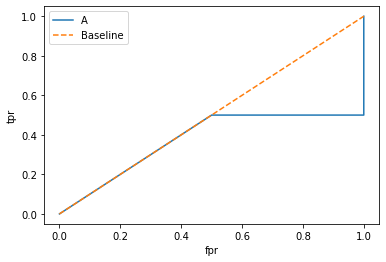

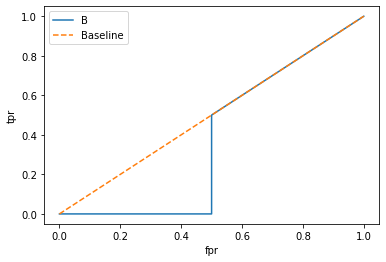

AUC: 0.375


In [474]:
# Test your code  (leave this part unchanged)

predictions = pd.DataFrame({"A":[0.9,0.9,0.6,0.55],"B":[0.1,0.1,0.4,0.45]})

correctlabels = ["A","B","B","A"]

print("AUC: {}".format(auc(predictions,correctlabels)))

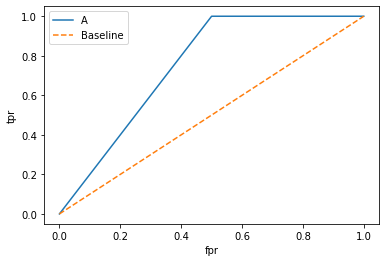

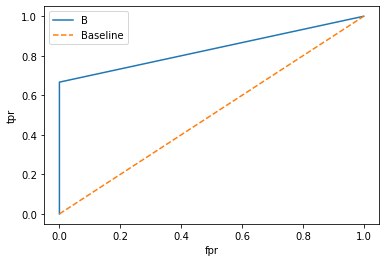

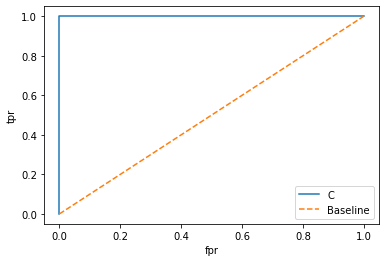

AUC: 0.8499999999999999


In [475]:
predictions = pd.DataFrame({"A":[0.5,0.5,0.5,0.25,0.25],"B":[0.5,0.25,0.25,0.5,0.25],"C":[0.0,0.25,0.25,0.25,0.5]})

correctlabels = ["B","A","B","B","C"]

print("AUC: {}".format(auc(predictions,correctlabels)))

### Comment on assumptions, things that do not work properly, etc.